 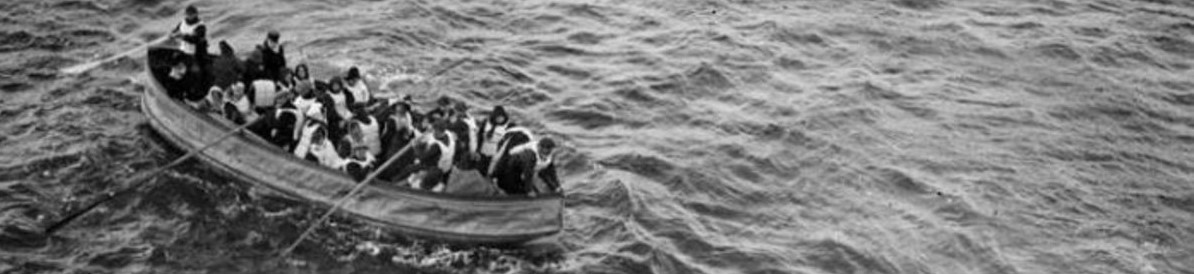

## Let's Start with import data and some important libraries... 

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
        
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Let's get some idea about data

In [ ]:
train=pd.read_csv("/kaggle/input/titanic/train.csv")
test=pd.read_csv("/kaggle/input/titanic/test.csv")
print(train.shape)
train.head()

In [ ]:
print(test.shape)
test.head()

**Nacessary Information (according to this table)

Survival: Survival (0 = No; 1 = Yes)

Pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

Name : Name

Sex : Sex

Age : Age

Sibsp : Number of Siblings/Spouses Aboard

Parch : Number of Parents/Children Aboard

Ticket : Ticket Number

Fare : Passenger Fare

Cabin : Cabin Number

Embarked : Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)**

In [ ]:
train.info()

## Hmmm...🙄 Let's do some data cleaning and feature engineering 😉

In [ ]:
train['Sex'].replace({'male':1,'female':0},inplace=True)
train['Sex'].head()

In [ ]:
train.isnull().sum()

In [ ]:
import missingno
missingno.matrix(train)

In [ ]:
train["Age"].fillna(train["Age"].mean(), inplace = True)
train.isnull().sum()

In [ ]:
train["Embarked"].value_counts(ascending=False)

In [ ]:
train["Embarked"].fillna("S", inplace = True)
train.isnull().sum()

In [ ]:
train["Embarked"].value_counts(ascending=False)

In [ ]:
train["Embarked"].fillna("S", inplace = True)
train.isnull().sum()

In [ ]:
train['Embarked'].replace({'C':1,'S':2,"Q":3},inplace=True)
train.head()

In [ ]:
train.drop(["PassengerId","Name","Ticket","Cabin"],axis=1,inplace=True)
train.head()

In [ ]:
ax = sns.boxplot(x=train["Fare"])

In [ ]:
train.loc[train["Fare"]>300, 'Fare']

In [ ]:
train["Fare"].mean()

In [ ]:
train[train["Fare"] > 300] = train["Fare"].mean()

In [ ]:
ax = sns.boxplot(x=train["Fare"])

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(18, 6))
sns.boxplot(data=train)

## lets see test data now

In [ ]:
test.isnull().sum()

In [ ]:
missingno.matrix(test)

In [ ]:
test["Age"].fillna((test["Age"].mean()), inplace = True)
test.isnull().sum()

In [ ]:
test['Sex'].replace({'male':1,'female':0},inplace=True)

In [ ]:
test.head()

In [ ]:
test['Embarked'].replace({'C':1,'S':2,"Q":3},inplace=True)
test.drop(["Name","Ticket","Cabin"],axis=1,inplace=True )
test

In [ ]:
ax = sns.boxplot(x=test["Fare"])

In [ ]:
test.loc[test["Fare"]>300, 'Fare']
test

In [ ]:
test["Fare"].mean()

In [ ]:
test[test["Fare"] > 300] = 35
test

In [ ]:
ax = sns.boxplot(x=test["Fare"])

In [ ]:
pid=pd.DataFrame()
pid["PassengerId"]=test["PassengerId"]
test.drop(["PassengerId"],axis=1,inplace=True)
pid

In [ ]:
y_train=train["Survived"]
x_train= train.drop(["Survived"],axis=1)
               
test

In [ ]:
test.isnull().sum()

In [ ]:
test["Fare"].fillna((test["Fare"].mean()), inplace = True)

In [ ]:
test.isnull().sum()

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(18, 6))
sns.boxplot(data=test)

## creat model train and see accuracy of model

In [ ]:
x_train = x_train.astype(int)
x_train.info()

In [ ]:
y_train = y_train.astype(int)
y_train.head()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train,y_train)


In [ ]:
from sklearn.metrics import accuracy_score
model.predict(test)
y_pred = model.predict(test)
model.score(x_train, y_train)


In [ ]:
plt.barh(x_train.columns, model.feature_importances_)


In [ ]:
output = pd.DataFrame({'PassengerId': pid.PassengerId, 'Survived': y_pred})
output.to_csv('my_submission.csv', index=False)

print("😋")